## Final Project:
### Controlling the sparkfun Qwiic Micro Oled with the OPT 101

### Abstract & Description:

In this experiment, we will try to control the Micro Oled using the OPT101. The idea is to make the micro oled display what the OPT101 is reading and turn it off if it reaches a certain value. In simpler words, we can it that we will use our finger as a switch. How? well, the OPT 101 reads the intesity of light near it. We just need to figure, using the serial monitor, what values it reads when we bring an object near it.
In our experiment, we discovered that when it goes below 500, that implies something is near it, like 7-10 cm away. Using this idea, we can make it do a lot of cool things. 

This project is a sort of an extention of Project 6 and 7. 

## Circuit schematic, Background and Discussion

We need to introduce the OPT 101 which will play a major role in our circuit. The 0.09 inch x 0.09 inch (2.29 mm × 2.29 mm) photodiode operates in the photoconductive mode for excellent linearity and low dark current. This small device detects the changes in light and operates some changes, if asked to.

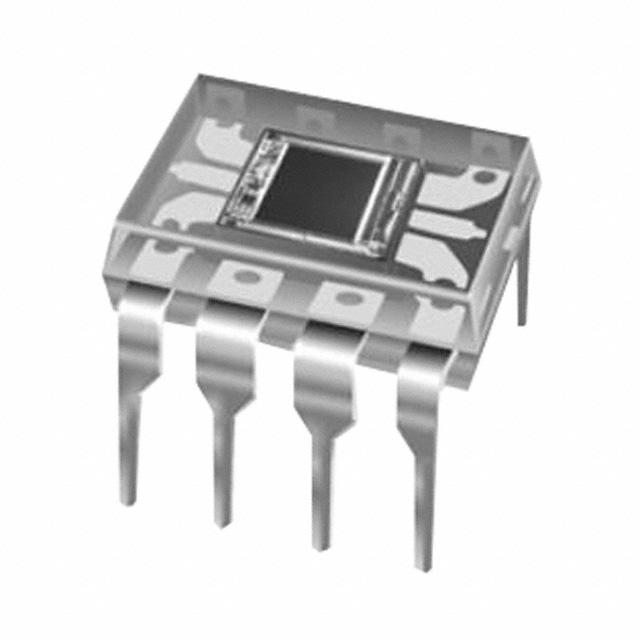

In [71]:
from IPython.display import Image
Image(filename='OPT101P.jpg', width = 320,height=240)

The Bi-Directional Level Converter allows the Arduino and the Altimeter to communicate without
getting confused or damaged. It is used to do logic level shifting. Also called a logic-level
shifter, it is a circuit used to translate signals from one logic level or voltage domain to another,
allowing compatibility between ICs with different voltage requirements, such as TTL and CMOS

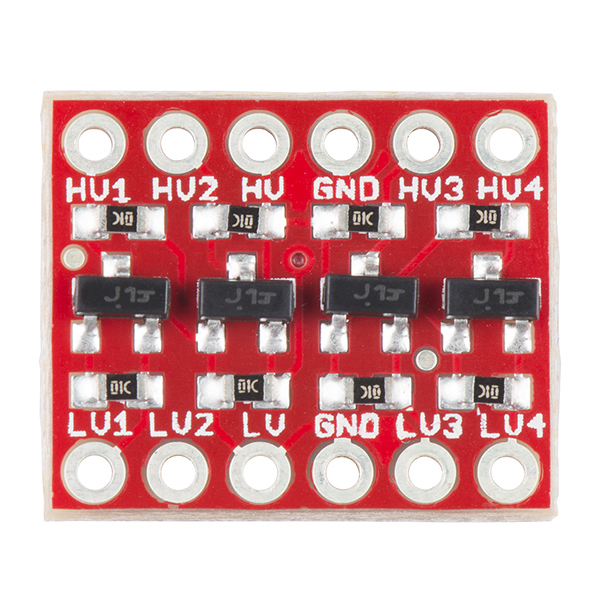

In [72]:
Image(filename='pic001.jpg', width = 320,height=240)

The small monochrome, blue-on-black OLED screen presents incredibly clear images for one's viewing pleasure. It’s “micro,” but it still packs a punch --- the OLED display is crisp, and you can fit a deceivingly large amount of graphics on there. This breakout is perfect for adding graphics to our project and displaying diagnostic information without resorting to a serial output, all with the ease of use of our own Qwiic Connect System.

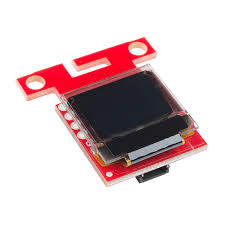

In [73]:
Image(filename='oled.jpg', width = 320,height=240)

The SparkFun Qwiic Adapter provides the perfect means to make any old I2C board into a Qwiic-enabled board. This adapter breaks out the I2C pins from the Qwiic connectors to pins that you can easily solder with your favorite I2C-enabled device.

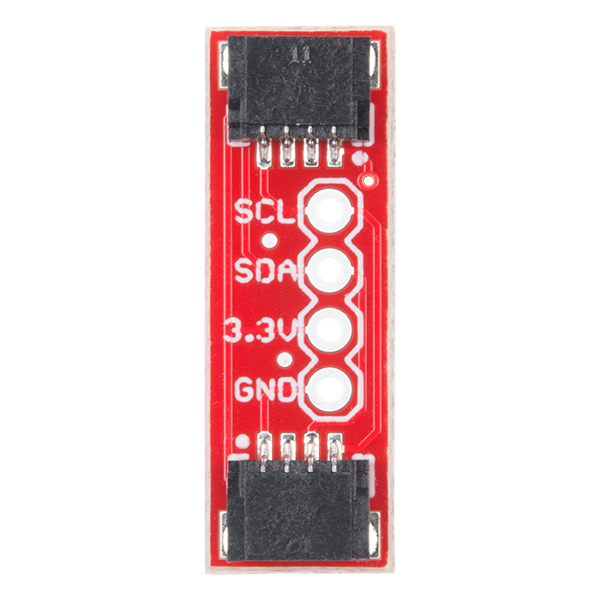

In [74]:
Image(filename='ad.jpg', width = 320,height=240)

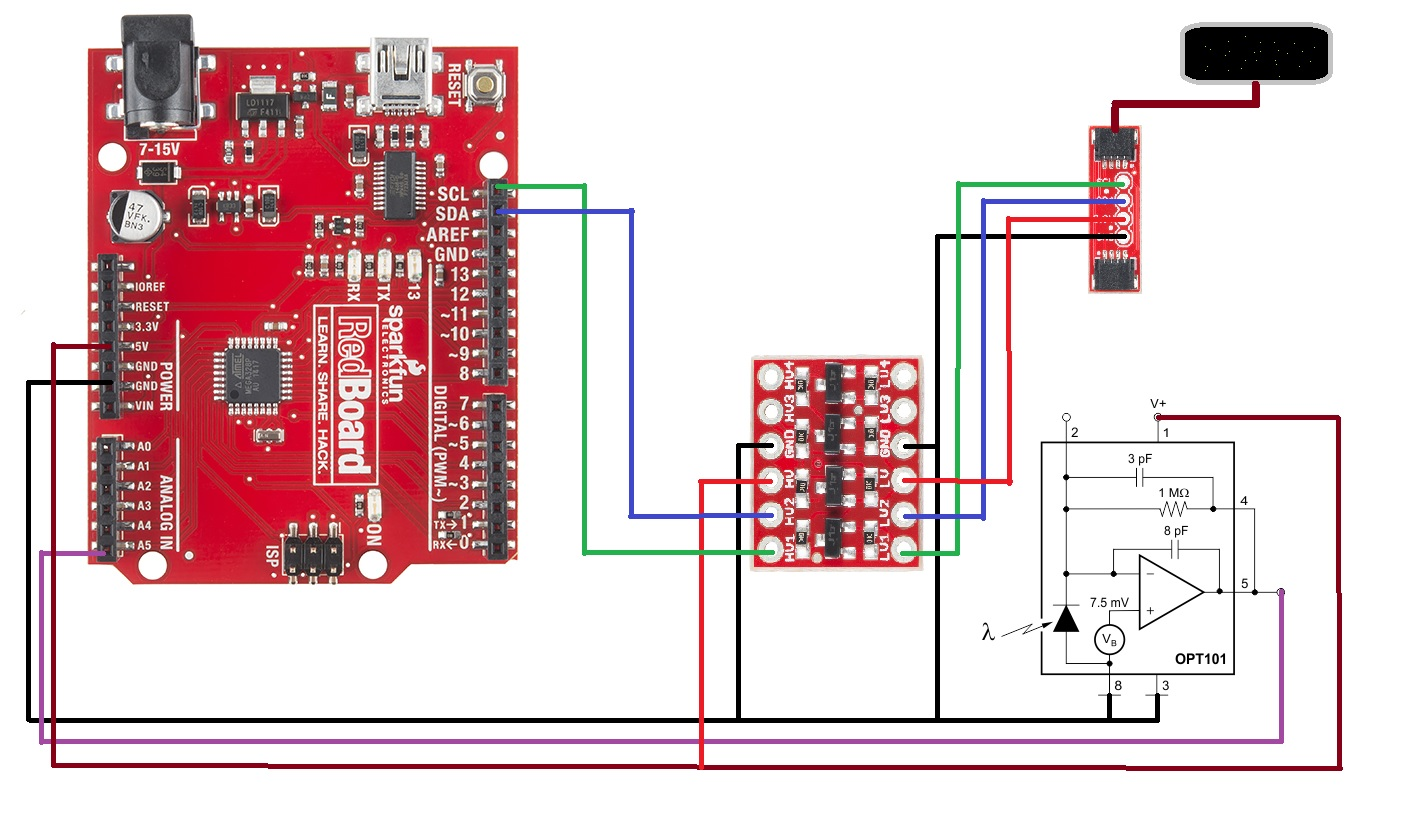

In [75]:
Image(filename='fi.jpg')

How does the circuit work?
Step1:

The arduino reads on Pin analog 5 the intensity measured by the OPT101. 

Step2:

As the Micro Oled only takes 3.3V, we used the Bi-directional level shifter in order to shift from 5V to 3.3V without damaging anything. 

For our Micro Oled, we also need the adapter, which provides the perfect means to make any old I2C board into a Qwiic-enabled board.

Step3:

We implemented the code that can help us to a couple of tasks, which are the following:

    1. In a normal room with lights on, the OPT 101 reads around 740-800.
    2. Knowing that, we tell the arduino to display these values on the screen. 
    3. When you bring anything like 10 cm close, the value read by the OPT drops from 740-800 to 400-200.
    4. In order to minimize the error, we asked the computer to keep displaying the values as long as it is above 500. Otherwise, display a blank screen.(We decided to display a couple of dots/pixels on the screen)


## Code Implementation

    /******************************************************************************
     * PrintTitle and PixelExample functions were modified for the Qwiic Micro OLED
     * by Joel Bartlett
     * 04/12/17
     * 
     * Development environment specifics:
     *  Arduino 1.0.5
     *  Arduino Pro 3.3V
     *  Micro OLED Breakout v1.0     ******************************************************************************/
    #include <Wire.h>  // Include Wire if you're using I2C
    #include <stdio.h> 

    #include <SFE_MicroOLED.h>  // Include the SFE_MicroOLED library

    //////////////////////////
    // MicroOLED Definition //
    //////////////////////////
    //The library assumes a reset pin is necessary. The Qwiic OLED has RST hard-wired, so pick an arbitrarty IO pin that is not being used
    #define PIN_RESET 9  
    //The DC_JUMPER is the I2C Address Select jumper. Set to 1 if the jumper is open (Default), or set to 0 if it's closed.
    #define DC_JUMPER 1 

    //////////////////////////////////
    // MicroOLED Object Declaration //
    //////////////////////////////////
    MicroOLED oled(PIN_RESET, DC_JUMPER);    // I2C declaration
    int count =0;
    int sense = 5;  // output pin of OPT101 attached to Analog 0
    int led =11 ;    // Output to Led at pin 11
    int val ;  


    void setup()
    {  
      pinMode(led,OUTPUT);
      Serial.begin(9600);
      delay(100);
      Wire.begin();
      oled.begin();    // Initialize the OLED
      oled.clear(ALL); // Clear the display's internal memory
      oled.display();  // Display what's in the buffer (splashscreen)
      delay(1000);     // Delay 1000 ms
      oled.clear(PAGE); // Clear the buffer.

      randomSeed(analogRead(A0) + analogRead(A1));
    }

    void pixelExample()
    {
      printTitle(" OFF", 1);

      for (int i=0; i<512; i++)
      {
        oled.pixel(random(oled.getLCDWidth()), random(oled.getLCDHeight()));
        oled.display();
      }
    }
    void loop()
    {
      val = analogRead(sense);
      Serial.println(val);
      Serial.print("Light Intensity Value  :  "); //  Values of 0 - 856

      if(val<500)  // Less Intensity than a Value of 25 = Light ON
      {
            pixelExample();
             delay(500);
      }
      if(val>500) // More intensity than a Value of 50 = Light OFF
      { 
         if(!count)printTitle(" ON", 1);
         delay(500);
         printTitle( String(val), 1);


      }
      count++;
    delay(1);
    }

    // Center and print a small title
    // This function is quick and dirty. Only works for titles one
    // line long.

    void printTitle(String title, int font)
    {
      int middleX = oled.getLCDWidth()/2 ;
      int middleY = oled.getLCDHeight()/2;

      oled.clear(PAGE);
      oled.setFontType(font);
      // Try to set the cursor in the middle of the screen
      oled.setCursor(middleX - (oled.getFontWidth() * (title.length()/2)),
                     middleY - (oled.getFontWidth() / 2));
      // Print the title:
      oled.print(title);
      oled.display();
      delay(250);
      oled.clear(PAGE);
    }


## Results

Once the code above is compiled, the Micro Oled displays a short message saying :"ON"


We could not capture this image because it disappears after only 0.5 seconds

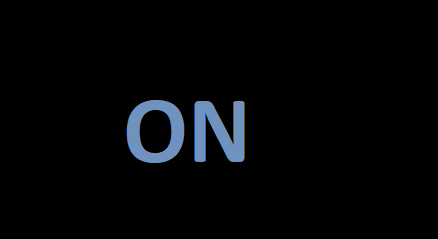

In [76]:
Image(filename='ons.png')

Once the "ON' message disappears, the micro Oled starts displaying the intensity on the screen. See below an image taken in the lab.


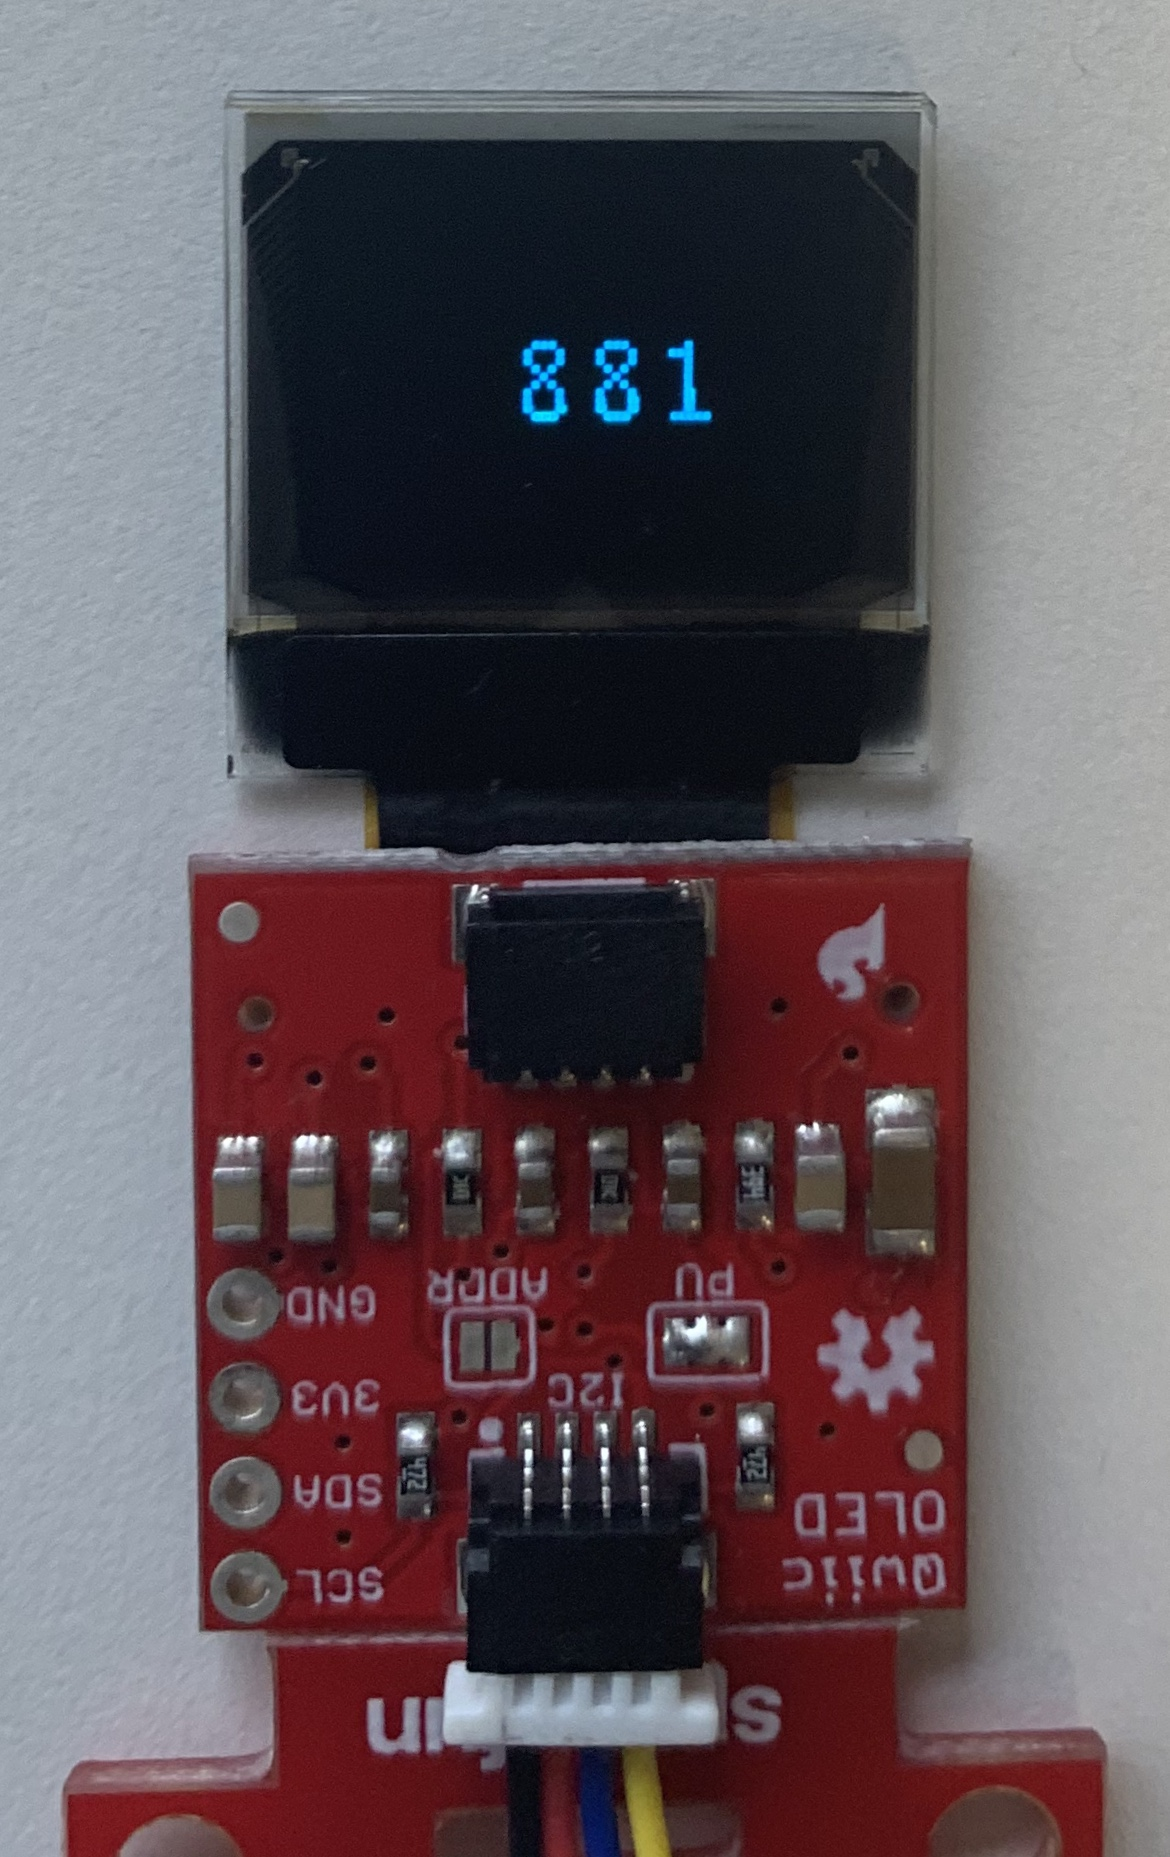

In [77]:
Image(filename='on.jpg')

Message displayed when the OPT reads anything under 500. You can use your finger, it works just fine.

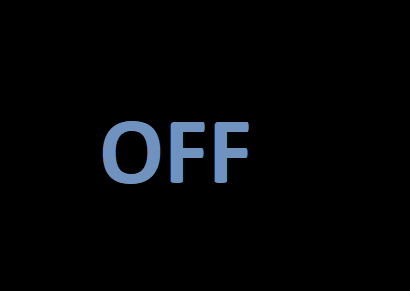

In [84]:
Image(filename='offs.png')

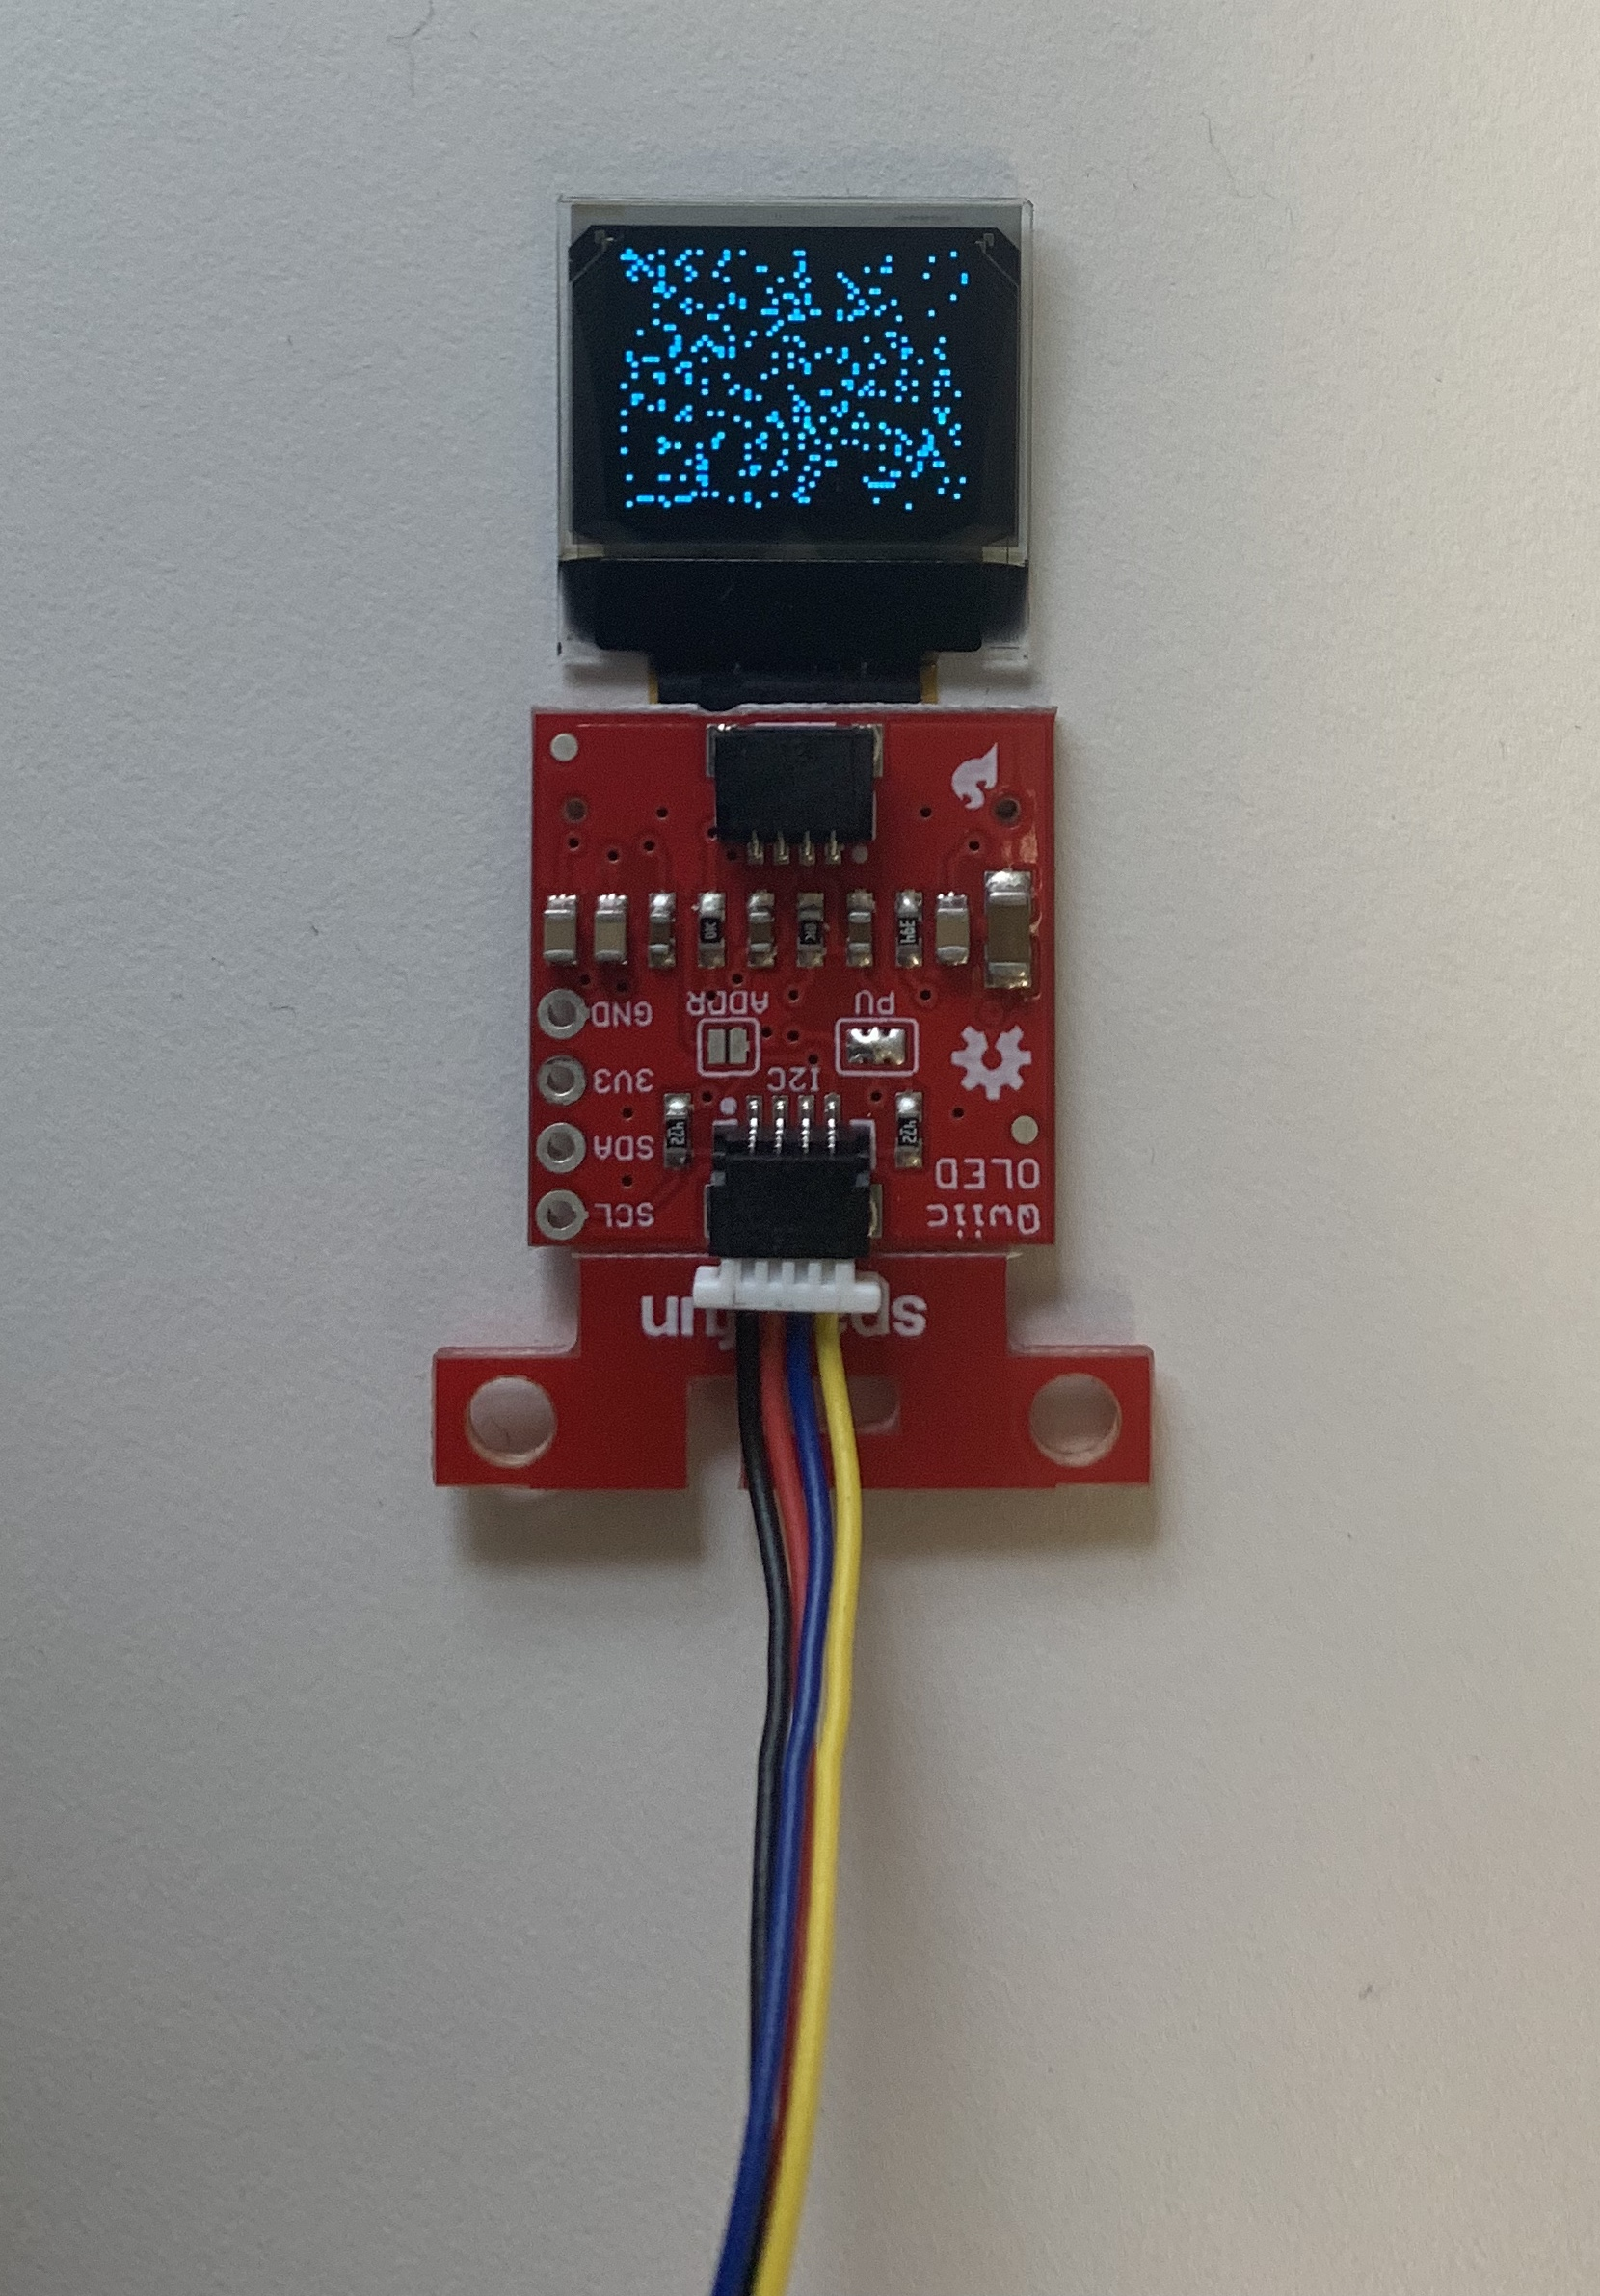

In [151]:
Image(filename='off.jpg')

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('light.csv')
df.head()

,Intensity
0,745
1,869
2,775
3,811
4,798


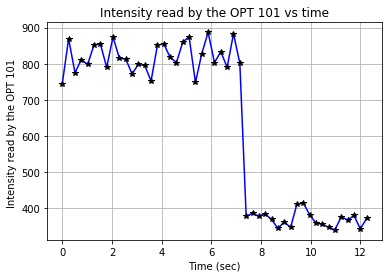

In [147]:
 
df = df.rename(columns={'Intensity': 'y'})
x = np.linspace(0,len(df.y)*0.25,len(df.y))
a = df.y.values
plt.plot(x,a,'b-')
plt.title("Intensity read by the OPT 101 vs time")
plt.grid()
plt.xlabel("Time (sec)")
plt.ylabel("Intensity read by the OPT 101 ")
plt.plot(x,a,'k*')

As shown in the graph, at time 7 sec, I had my finger on the OPT 101 and the value that it reads really dropped to less than 400.

##### STATS

Let's make this values less jumpy. We just need to sort the values. In this experience we are basically considerng any number above 500 as On and OFF for any number below 500. This is why we would expect a unit step function. 
We only see 2 states in overall.

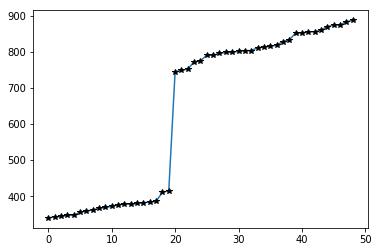

In [148]:
def sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x
plt.plot(sort(a))
plt.plot(sort(a),'k*')



Max=  887
Min= 340
Mean= 635.6122448979592


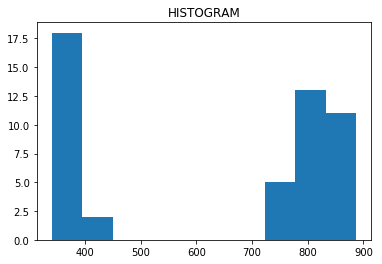

In [150]:
plt.hist(a)
plt.title("HISTOGRAM")
print("Max= ",max(a))         
print("Min=",min(a))
print("Mean=",a.mean())

###### This data were collected using the serial monitor. 

## Conclusion

Altogether, this experiment was merely focusing on finding the perfect range at which the OPT 101 will meet our expectations. After conducting the experiment a couple of times, we picked  500, so we can evoid errors.
Once having our specific point, we were able to make the Micro Oled do whatever we wanted it to do when you have an object near the sensor. 


## References:
    
Bi-Directional Logic Level Converter Hookup Guide,[www.sparkfun.com](learn.sparkfun.com/tutorials/bi-directional-logic-level-converter-hookup-guide/all)
    
#213648, Member. “SparkFun Micro OLED Breakout (Qwiic).” LCD-14532 - SparkFun Electronics,[www.sparkfun.com](www.sparkfun.com/products/14532)

“SparkFun Qwiic Adapter.” DEV-14495 - SparkFun Electronics, [www.sparkfun.com](www.sparkfun.com/products/14495)